In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
startup_data = pd.read_csv('indian_startup_funding.csv') 

In [2]:
startup_data.head()

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Website URL
0,14-04-2021,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0,https://www.swiggy.com/
1,14-04-2021,Beldara,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0,https://beldara.com/
2,07-04-2021,Groww,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0,https://groww.in/
3,05-04-2021,Meesho,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0,http://www.meesho.com/
4,01-04-2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0,http://www.byjus.com/


In [3]:
(startup_data.isnull().sum() / startup_data.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Amount in USD      30.82 %
Industry           29.14 %
Website URL        16.87 %
Location             5.6 %
Sub-vertical        5.32 %
Investors           1.09 %
Investment Type     0.22 %
Date                0.06 %
Startup Name         0.0 %
dtype: object

In [4]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3210 non-null   object 
 1   Startup Name     3212 non-null   object 
 2   Industry         2276 non-null   object 
 3   Sub-vertical     3041 non-null   object 
 4   Location         3032 non-null   object 
 5   Investors        3177 non-null   object 
 6   Investment Type  3205 non-null   object 
 7   Amount in USD    2222 non-null   float64
 8   Website URL      2670 non-null   object 
dtypes: float64(1), object(8)
memory usage: 226.0+ KB


In [5]:
startup_data['Amount in USD'] = startup_data['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("ECommerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("E-commerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("eCommerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Ecommerce", "E-Commerce"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Fin-Tech", "FinTech"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("FinTech", "Finance"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("EduTech", "Education"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Ed-Tech", "Education"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Edu-tech", "Education"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Food and Beverage", "Food & Beverage"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("IT", "Technology"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Information Technology", "Technology"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("SaaS", "Technology"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace(" s", "Misc"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Food & Beverages", "Food & Beverage"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Food & Beverages", "Food & Beverage"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Transportationation", "Transport"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Health and Wellness","Healthcare"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("Transportation","Transport"))
startup_data['Industry'] = startup_data['Industry'].apply(lambda x : str(x).replace("EdTech","Education"))

In [6]:
startup_data['Amount in USD'] = pd.to_numeric(startup_data['Amount in USD'])

In [7]:
del startup_data["Website URL"]
startup_data.head()

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD
0,14-04-2021,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0
1,14-04-2021,Beldara,E-Commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0
2,07-04-2021,Groww,Finance,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0
3,05-04-2021,Meesho,E-Commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0
4,01-04-2021,BYJU’S,Education,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0


In [8]:
startup_data['Date'] = pd.to_datetime(startup_data.Date)
startup_data.head()

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD
0,2021-04-14,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,343000000.0
1,2021-04-14,Beldara,E-Commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,7400000.0
2,2021-07-04,Groww,Finance,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,83000000.0
3,2021-05-04,Meesho,E-Commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,300000000.0
4,2021-01-04,BYJU’S,Education,Online tutoring,Bengaluru,Innoven Capital,Series F,460000000.0


Number of funding per year in decreasing order(Top 20)
 2016.0    1018
2015.0     934
2017.0     687
2018.0     310
2020.0     121
2019.0     111
2021.0      29
Name: Year, dtype: int64


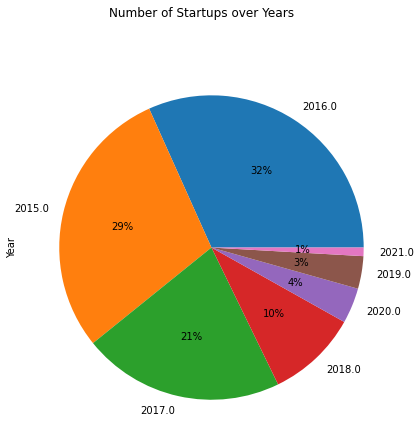

In [9]:
startup_data["Year"] = (pd.to_datetime(startup_data['Date']).dt.year)
temp = startup_data['Year'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per year in decreasing order(Top 20)\n",temp)
year_month = startup_data['Year'].value_counts()
startup_data['Year'].value_counts().plot(kind='pie', figsize=(11,7), title='Number of Startups over Years', subplots=True, autopct='%.f%%')
plt.show()

In [10]:
def bar_chart(column_name, x_labbel, y_label, plot_title):   
    plt.figure(figsize=(15,8))
    sns.barplot(column_name.index, column_name.values, alpha=0.9)
    plt.xticks(rotation='vertical')
    plt.xlabel(x_labbel, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(plot_title, fontsize=16)
    plt.show()
    

# 2015 dataset does not include Industry and Sub-Vertical

Consumer Internet    958
nan                  936
Technology           506
E-Commerce           322
Finance               94
Healthcare            75
Education             59
Food & Beverage       37
Logistics             32
Transport             13
Real Estate            8
Others                 6
Hospitality            5
AgriTech               4
Automobile             4
Name: Industry, dtype: int64


D:\Program Files\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


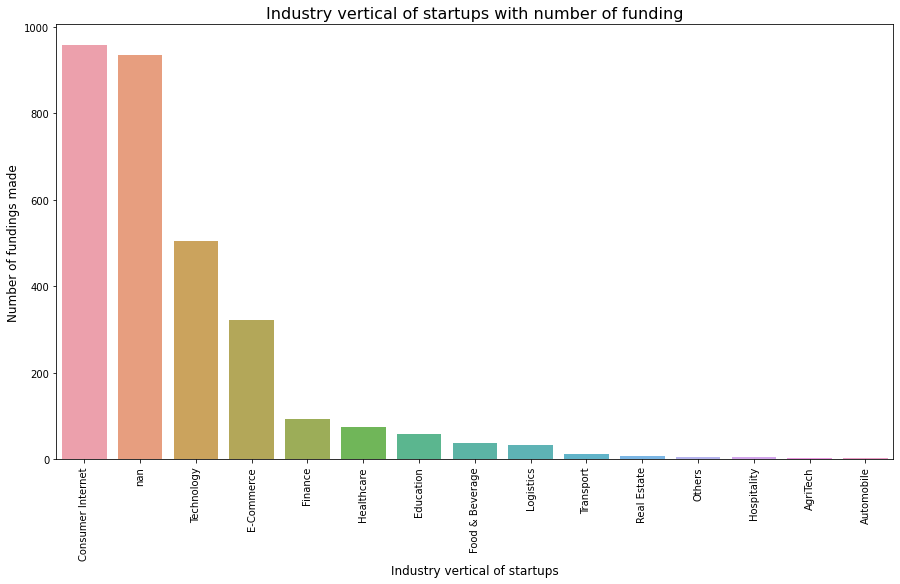

In [11]:
industry = startup_data['Industry'].value_counts().head(15)
print(industry)

bar_chart(industry, 'Industry vertical of startups', 'Number of fundings made', 'Industry vertical of startups with number of funding')

In [12]:
startup_data[startup_data.Industry=="Others"]

,Date,Startup Name,Industry,Sub-vertical,Location,Investors,Investment Type,Amount in USD,Year
824,2017-07-26,Creator’s Gurukul,Others,Co-Working Space Provider,New Delhi,Yuvraj Singh,Seed Funding,0.0,2017.0
1434,2016-10-17,Rentalpha,Others,equipment rental and leasing company,Mumbai,Bravia Capital,Private Equity,16000000.0,2016.0
1625,2016-08-08,Wefly Indoor Skydiving,Others,Indoor Skydiving Sports Provider,Mumbai,Swastika Company Ltd.,Seed Funding,40000.0,2016.0
1630,2016-04-08,lehlehsports,Others,Sports Arena discovery,New Delhi,Anglian Omega Network,Seed Funding,0.0,2016.0
1750,2016-06-24,KabadiExpress,Others,Free Door Step Scrap Pickup Service,New Delhi,Undisclosed investor,Seed Funding,148000.0,2016.0
1751,2016-06-24,LEAP India,Others,Supply Chain Equipment & Services provider,Mumbai,Mayfield Ventures,Private Equity,3000000.0,2016.0


In [13]:
startup_data["Investors"].value_counts()[:50]
#how much invested

Undisclosed Investors                                        39
Undisclosed investors                                        31
Ratan Tata                                                   25
Indian Angel Network                                         24
Kalaari Capital                                              16
Group of Angel Investors                                     15
Sequoia Capital                                              15
Accel Partners                                               14
Undisclosed Investor                                         13
Venture Catalysts                                            11
Brand Capital                                                11
undisclosed investors                                        11
RoundGlass Partners                                          10
SAIF Partners                                                10
Nexus Venture Partners                                        9
Info Edge (India) Ltd                   